<a href="https://colab.research.google.com/github/divyanshbajpai/EVA4-Coursework/blob/master/Assignment-14/Copy_of_DenseDepth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!git clone https://github.com/ialhashim/DenseDepth.git

Cloning into 'DenseDepth'...
remote: Enumerating objects: 235, done.
remote: Total 235 (delta 0), reused 0 (delta 0), pack-reused 235
Receiving objects: 100% (235/235), 11.80 MiB | 14.01 MiB/s, done.
Resolving deltas: 100% (115/115), done.


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
cd /content/drive/My\ Drive

/content/drive/My Drive


In [0]:
!ls

 52061031.pdf		     IMG_20200131_213657__01__01.jpg
 ADITYA.pdf		    'kfp images'
 Assignment12		     maskoverlay.rar
 Assignment-13		     MobileBill_1047681785_249090639_7760630790.pdf
 Assignment-9		     MobileBill_1047681785_612303333_7760630790.pdf
'Cat-2014 admit card.pdf'    Model
'Colab Notebooks'	     overlay.rar
 Cover_letter.gdoc	    'Pavan Model'
 DenseDepth		     PyPackage
'Google Photos'		     test_indices.npy
 Harid_FeatureTracking.pdf   weights
 hvc_data.zip		     YoloV3_Annotation_Tool
 hvc_encoded.csv


In [0]:
!unrar x "/content/drive/My Drive/overlay.rar" "/content/drive/My Drive/1"

Streaming output truncated to the last 5000 lines.
Extracting  /content/drive/My Drive/1/overlay/img14_img023_17.jpg          9%  OK 
Extracting  /content/drive/My Drive/1/overlay/img14_img023_18.jpg          9%  OK 
Extracting  /content/drive/My Drive/1/overlay/img14_img023_19.jpg          9%  OK 
Extracting  /content/drive/My Drive/1/overlay/img14_img023_2.jpg           9%  OK 
Extracting  /content/drive/My Drive/1/overlay/img14_img023_3.jpg           9%  OK 
Extracting  /content/drive/My Drive/1/overlay/img14_img023_4.jpg           9%  OK 
Extracting  /content/drive/My Drive/1/overlay/img14_img023_5.jpg           9%  OK 
Extracting  /content/drive/My Drive/1/overlay/img14_img023_6.jpg           9%  OK 
Extracting  /content/drive/My Drive/1/overlay/img14_img023_7.jpg           9%  OK 
Extracting  /content/drive/My Drive/1/overlay/img14_img023_8.jpg           9%  OK 
Extracting  /content/drive/My

In [0]:
!wget https://s3-eu-west-1.amazonaws.com/densedepth/nyu.h5 -O ./DenseDepth/nyu.h5

--2020-05-10 09:36:23--  https://s3-eu-west-1.amazonaws.com/densedepth/nyu.h5
Resolving s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)... 52.218.106.179
Connecting to s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)|52.218.106.179|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 172897376 (165M) [application/h5]
Saving to: ‘./DenseDepth/nyu.h5’

./DenseDepth/nyu.h5 100%[===================>] 164.89M  69.5MB/s    in 2.4s    

2020-05-10 09:36:26 (69.5 MB/s) - ‘./DenseDepth/nyu.h5’ saved [172897376/172897376]



In [0]:
!cd DenseDepth; python test.py

Using TensorFlow backend.
Loading model...

Model loaded (nyu.h5).

Loaded (12) images of size (256, 256, 3).
Size after prediction -  (12, 128, 128, 1)
(12, 128, 128, 1)
value [[[0.22631696]
  [0.22631697]
  [0.22032952]
  ...
  [0.21773627]
  [0.22154306]
  [0.22154306]]

 [[0.22631696]
  [0.22631697]
  [0.22032952]
  ...
  [0.21773627]
  [0.22154306]
  [0.22154306]]

 [[0.22297743]
  [0.22297743]
  [0.22171411]
  ...
  [0.21596368]
  [0.21868691]
  [0.21868691]]

 ...

 [[0.19322993]
  [0.19322993]
  [0.19267388]
  ...
  [0.19091305]
  [0.19507192]
  [0.19507192]]

 [[0.19676805]
  [0.19676805]
  [0.1953188 ]
  ...
  [0.19319318]
  [0.19866951]
  [0.1986695 ]]

 [[0.19676805]
  [0.19676805]
  [0.1953188 ]
  ...
  [0.19319318]
  [0.19866951]
  [0.1986695 ]]]
<Figure size 1000x500 with 1 Axes>


In [0]:
new_imabe.shape

NameError: ignored

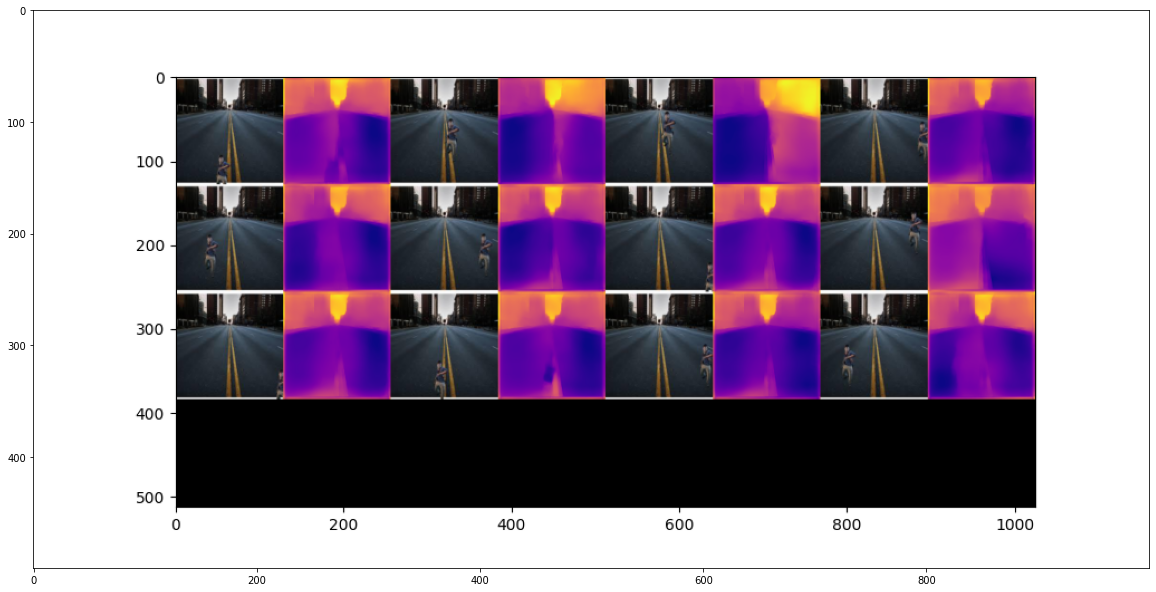

In [0]:
from matplotlib import pyplot as plt
from skimage import io

plt.figure(figsize=(20,20))
plt.imshow( io.imread('./DenseDepth/test.png') )

In [0]:
cd DenseDepth/

/content/drive/My Drive/DenseDepth


In [0]:
import os
import glob
import argparse
import matplotlib

# Keras / TensorFlow
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '5'
from keras.models import load_model
from layers import BilinearUpSampling2D
from utils import predict, load_images, display_images
from matplotlib import pyplot as plt

# Argument Parser
parser = argparse.ArgumentParser(description='High Quality Monocular Depth Estimation via Transfer Learning')
parser.add_argument('--model', default='nyu.h5', type=str, help='Trained Keras model file.')
parser.add_argument('--input', default='examples/*.jpg', type=str, help='Input filename or folder.')
args = parser.parse_args()

# Custom object needed for inference and training
custom_objects = {'BilinearUpSampling2D': BilinearUpSampling2D, 'depth_loss_function': None}

print('Loading model...')

# Load model into GPU / CPU
model = load_model(args.model, custom_objects=custom_objects, compile=False)

print('\nModel loaded ({0}).'.format(args.model))

# Input images
inputs = load_images( glob.glob(args.input) )
print('\nLoaded ({0}) images of size {1}.'.format(inputs.shape[0], inputs.shape[1:]))

# Compute results
outputs = predict(model, inputs)

#matplotlib problem on ubuntu terminal fix
#matplotlib.use('TkAgg')   

# Display results
viz = display_images(outputs.copy(), inputs.copy())
plt.figure(figsize=(10,5))
plt.imshow(viz)
plt.savefig('test.png')
plt.show()

Using TensorFlow backend.
usage: ipykernel_launcher.py [-h] [--model MODEL] [--input INPUT]
ipykernel_launcher.py: error: unrecognized arguments: -f /root/.local/share/jupyter/runtime/kernel-5de9c44b-1b5b-4c67-8174-2725879a081f.json


SystemExit: ignored

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
